2\. Consider a binomial tree with $S_0 = 50, u = 1.06, r = 0.01, d = 0.98$ (all values per period) and $n = 26$ periods.

a. Generate a sample of $M = 25$ values of $S_{26}$. Compute the resulting Monte Carlo estimate for the value of a European Put which has strike $K = 60$. Provide both the
point estimate based on sample average, as well as a 95% confidence interval based on
the t-distribution of the sample average estimator.

In [1]:
import numpy as np 
from itertools import product
import timeit
from scipy.stats import binom, norm
import matplotlib.pyplot as plt
import math
%matplotlib inline

np.random.seed(1)

S0 = 50; u = 1.06; r = 0.01; d = 0.98; n = 26; M = 25; K = 60
q = (1+r-d)/(u-d)

def MC_euro_put_payoff(K):
    U = np.random.uniform(size = M)
    S = Payoff = np.zeros(M)

    for i in range(M):
        S[i] = S0*(u/d)**(binom.ppf(U[i], n, q))*d**n
        Payoff[i] = max(K-S[i], 0)
    
    return Payoff 

def ptEstimate_and_95CI(K, Payoff):
    
    discountedPayoff = Payoff/(1+r)**n
    Vhat = np.mean(discountedPayoff)

    CI = (Vhat-2.060*np.std(discountedPayoff)/np.sqrt(M), 
         Vhat+2.060*np.std(discountedPayoff)/np.sqrt(M))
    
    return Vhat, CI

Vhat, CI = ptEstimate_and_95CI(K, MC_euro_put_payoff(K))

print('The point estimate is %s.'%Vhat)
print('The 95-percent CI is %s.'%(CI,))

The point estimate is 2.6829218905543364.
The 95-percent CI is (0.7502105981849123, 4.6156331829237605).


b. Repeat the above 10 times and summarize your results. Be sure to compare your MC estimates to the true no-arbitrage price of this Put (which is the direct expectation
using the distribution in (a)).

In [2]:
import pandas as pd

K = 60
everything = list()

for i in range(10):
    everything.append(ptEstimate_and_95CI(K, MC_euro_put_payoff(K)))

Vhats, CIs = zip(*everything)
    
allS = S0*(u/d)**np.arange(n)*d**n
put_payoff = lambda s: max(K - s, 0)

allS_payoffs = np.array(list(map(put_payoff, allS)))
truePrice = sum(allS_payoffs*binom.pmf(np.arange(n), n, q))/(1+r)**n
truePriceSq = sum(allS_payoffs**2*binom.pmf(np.arange(n), n, q))/(1+r)**(2*n)
trueSd = np.sqrt(truePriceSq - truePrice**2)
print('True mean price: %s\nTrue standard deviation: %s'%(truePrice, trueSd))   

pd.DataFrame({'Point Estimate':Vhats, '95-percent CI':CIs, 
              'Abs. Error of Point Estimate':list(map(abs, Vhats - truePrice))},
            index = list(range(1,11)))

True mean price: 2.123586766322793
True standard deviation: 3.6851920061217203


,Point Estimate,95-percent CI,Abs. Error of Point Estimate
1,2.801249,"(1.209202787358666, 4.39329583692839)",0.677663
2,2.659100,"(1.0526701548470043, 4.265529862866649)",0.535513
3,1.536658,"(-0.031469540452262246, 3.104786024883026)",0.586929
4,3.355542,"(1.3507046965348235, 5.360379093033799)",1.231955
5,3.399286,"(1.5423340209423027, 5.256237264961017)",1.275699
6,2.127113,"(0.6279440140105548, 3.6262810900553877)",0.003526
7,2.528286,"(0.967117467336458, 4.0894547819640135)",0.404699
8,2.368287,"(0.7131129404393837, 4.023461666458105)",0.244701
9,1.185907,"(-0.096884573257777, 2.4686976193919916)",0.937680
10,0.946678,"(-0.6489341074535336, 2.542290673842027)",1.176908


c) Repeat parts a-b for the European Call with strike K = 80. How is this new case different from before?        

In [3]:
def MC_Euro_call_payoff(K):
    U = np.random.uniform(size = M)
    S = Payoff = np.zeros(M)
    q = (1+r-d)/(u-d)

    for i in range(M):
        S[i] = S0*(u/d)**(binom.ppf(U[i], n, q))*d**n
        Payoff[i] = max(S[i]-K, 0)
    
    return Payoff 

K = 80 
Vhat, CI = ptEstimate_and_95CI(K, MC_Euro_call_payoff(K))
print('The point estimate is %s.'%Vhat)
print('The 95-percent CI is %s.'%(CI,))

everything = list()

for i in range(10):
    everything.append(ptEstimate_and_95CI(K, MC_Euro_call_payoff(K)))

Vhats, CIs = zip(*everything)
    
allS = S0*(u/d)**np.arange(n)*d**n
call_payoff = lambda s: max(s - K, 0)

allS_payoffs = np.array(list(map(call_payoff, allS)))
truePrice = sum(allS_payoffs*binom.pmf(np.arange(n), n, q))/(1+r)**n
truePriceSq = sum(allS_payoffs**2*binom.pmf(np.arange(n), n, q))/(1+r)**(2*n)
trueSd = np.sqrt(truePriceSq - truePrice**2)
print('\nTrue mean price: %s\nTrue standard deviation: %s'%(truePrice, trueSd))   

pd.DataFrame({'Point Estimate':Vhats, '95-percent CI':CIs, 
              'Abs. Error of Point Estimate':list(map(abs, Vhats - truePrice))},
            index = list(range(1,11)))

The point estimate is 0.6169256972069234.
The 95-percent CI is (-0.38197167534668863, 1.6158230697605354).

True mean price: 0.8114443935649318
True standard deviation: 3.040950280803362


,Point Estimate,95-percent CI,Abs. Error of Point Estimate
1,0.186540,"(-0.021582952090738988, 0.3946635812044711)",0.624904
2,0.331114,"(-0.22089812003498882, 0.8831260639510612)",0.480330
3,2.023651,"(-0.19649211467629435, 4.243794300906761)",1.212207
4,0.734453,"(-0.747951659998821, 2.2168571607594196)",0.076992
5,0.537868,"(-0.2136195366923498, 1.2893550051153397)",0.273577
6,0.455474,"(-0.11103050758335126, 1.0219788709085782)",0.355970
7,1.682492,"(-0.10476967489747957, 3.469754513987998)",0.871048
8,0.517654,"(-0.05424062738780511, 1.0895492004176095)",0.293790
9,1.550832,"(-0.651029188017364, 3.7526921972640306)",0.739387
10,1.477696,"(-0.17097136364708643, 3.126364288661163)",0.666252


3\. Consider a Lookback option which pays $V_N = \text{max}(\text{max}_{n\leq N} S_n-K, 0)$ where $\text{max}_{n\leq N} S_n = 
\text{max}(S_0, S_1,..., S_N)$ is the maximum stock price over $N$ periods. For the parameters, $S_0 = 50, r = 0.01, u = 1.06, d = 0.98, K = 55$ and $N = 30$, estimate the no-arbitrage
value of this option at $t = 0$ using a Monte Carlo simulation with $M = 100$ samples. Be sure to use antithetic variables, and generate your samples in pairs.

Hand-in: 
    
a) the code you used.

b) a histogram of the resulting values of option payoff $V_N$.

c) Sample mean/SD of your payoffs.

d) Final answer with a 99% - confidence interval.

In [4]:
# a

S0 = 50; u = 1.06; r = 0.01; d = 0.98; N = 30; M = 100; K = 55

def binomConvert(UUi, q):
    upow = (UUi < q).astype(int)
    dpow = (UUi >= q).astype(int)
    
    return upow, dpow 
         
def antithetic_path(M):
    q = (1+r-d)/(u-d)
    S = np.zeros((2*M, N+1))
    discountedPayoffs = np.zeros(M)
    S[:, 0] = S0
    
    for i in range(N):
        UUi = np.random.uniform(size = M)
        upow, dpow = binomConvert(UUi, q)

        U_anti = 1 - UUi
        upow1, dpow1 = binomConvert(U_anti, q)
        
        S[0:M, i+1] = S[0:M, i] * u**upow * d**dpow
        S[M:2*M, i+1] = S[0:M, i] * u**upow1 * d**dpow1
                
    return S

/Users/Emily/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


(0.0, 70.0)

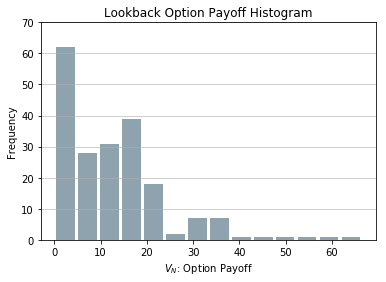

In [5]:
# b

S = antithetic_path(M)

discountedPayoffs = [1/(1+r)**N * max(max(S[i, :]) - K, 0) 
                            for i in range(2*M)]

n, bins, patches = plt.hist(x=discountedPayoffs, bins='auto', 
                            color='#607c8e', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('$V_N$: Option Payoff')
plt.ylabel('Frequency')
plt.title('Lookback Option Payoff Histogram')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [6]:
# c

sample_mean = np.mean(discountedPayoffs)
sample_std = np.std(discountedPayoffs)

print('Sample mean: %s'%sample_mean)
print('Sample standard deviation: %s'%sample_std)

Sample mean: 12.762657082923976
Sample standard deviation: 11.637408544592539


In [7]:
# d

CI = (sample_mean-2.58*sample_std/np.sqrt(M), 
         sample_mean+2.58*sample_std/np.sqrt(M))

print('The 99-percent CI is %s.'%(CI,))

The 99-percent CI is (9.760205678419101, 15.76510848742885).


4\. The Black-Scholes model assumes that 

$$S_T = S_0 exp((r-0.5\sigma^2)T + \sigma \sqrt{T}Z)$$

where $Z$ is standard normal, independent of everything else and $\sigma$ is the model parameter.


Consider a European Call with strike $K = 45$ and maturity $T = 1/2$ for an asset with $S_0 = 50, \sigma= 0.2$. The interest rate is $r = 0.04$ (here all parameters are in annual units). Because this is a European contract, for Monte Carlo purposes we can directly sample from the log-normal distribution of $S_T$. [As a reference, see pp. 4–6 in Glasserman
Chapter 1]

a) Using a sample of 25 Monte Carlo values (use the basic method, without any enhancements) for $S_T$ , estimate the value of this European Call and a 95% confidence interval.
Compare to the true Black-Scholes price of the Call.

In [8]:
np.random.seed(0)
K = 45; T = 1/2; S0 = 50; sigma = 0.2; r = 0.04; M = 25

def MC_bs_euro_call_payoff():
    
    ST = discountedPayoff = np.zeros(M)
    for i in range(M):
        Z = np.random.normal(0,1)
        ST[i] = S0*np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
        discountedPayoff[i] = max(ST[i] - K, 0)/(1 + r)**T
    
    return discountedPayoff

def ptEstimate_and_95CI(K, discountedPayoff):
    
    Vhat = np.mean(discountedPayoff)

    CI = (Vhat-2.060*np.std(discountedPayoff)/np.sqrt(M), 
         Vhat+2.060*np.std(discountedPayoff)/np.sqrt(M))
    
    return Vhat, CI

def callPrice(s, x, r, sigma, t):
    a = (math.log(s/x) + (r + sigma * sigma/2.0) * t) / \
        (sigma * math.sqrt(t))
    b = a - sigma * math.sqrt(t)
    return s * norm.cdf(a) - x * math.exp(-r * t) * norm.cdf(b)

Payoff = MC_bs_euro_call_payoff()
Vhat, CI = ptEstimate_and_95CI(K, Payoff)

print('The point estimate is %s.'%Vhat)
print('The 95-percent CI is %s.'%(CI,))
print('True BS price is %s.'%callPrice(S0, K, r, sigma, T))

The point estimate is 9.866354904928823.
The 95-percent CI is (6.972566885212695, 12.760142924644951).
True BS price is 6.573775055279903.


b) Quasi-Monte Carlo: take $U = {0.02, 0.06, . . . , 0.98}$ to be a grid of length 25 in [0,1]. Use the inverse cdf method to compute the corresponding $S_T$ values ( eg the first
sample is the 2% percentile of the standard normal, then use $qnorm()$ command to get the corresponding Z-value and plug into (1)). Average the resulting 25 payoffs to come up with a deterministic estimate of the Call price. Since the answer is deterministic, there is no confidence interval, just a point estimate.
Show your work/code and discuss the results in relation to part a)

In [9]:
U = np.arange(0.02, 1.0, 0.02)
Z = norm.isf(U) # inverse cdf 

ST = S0*np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
discountedPayoff = [max(s - K, 0)/(1 + r)**T for s in ST]

print('The deterministic estimate of the call price is %s.'
      %np.mean(discountedPayoff))

The deterministic estimate of the call price is 6.418255623445544.


Compared to the call option price found in part a, this price might be a fairer price since there are no repeated prices and the Z-values being used are similar to antithetic values which reduces variance. 

5\. Basket options have payoffs that depend on the value of multiple underlying assets. For example, consider a payoff based on the Dow Jones Industrial Average. The DJIA is a price-weighted index, namely $$DJIA(T) = \frac{\sum_i S^i(T)}{0.146}$$ where $S^i(T)$ ) is the share price of the i-th component of the index. See wikipedia.org/wiki/Dow_Jones_Industrial_Average#Calculation The real-world Dow has 30 components, but for our purposes we will take $I = 5$ components. Assume that $S^i(0) = 10∗i$ (i.e. $S^1(0) = 10, S^2(0) = 20$ and so on), and each component follows an independent
Black-Scholes model (1) with $r = 0.03$ and $\sigma_i = 0.1 + 0.05 ∗ i$. Thanks to independence, simulation of $S^i(T)$ is straightforward (you just need to loop over $i$ and use the correct volatility $\sigma_i$).
There are no analytic formulas for Basket option values. Using Monte Carlo with $M = 500$, price a Basket Put with payoff $$V_T = max(\frac{S^(T)+S^2(T)+S^3(T)+S^4(T)+S^5(T)}{5}-30, 0), \; r = 0.03, \; T=1.$$ Submit your code, histogram of the contract payoffs, estimated contract value today,
and respective 98% CI.

The estimated price of this Basket put option is 31.30491342125726.
The 98-percent CI is (30.37143585680247, 32.23839098571205).


(0.0, 80.0)

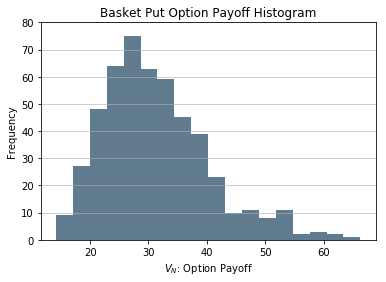

In [10]:
r = 0.03; M = 500; T = 1 
ST = np.zeros([M, 5]) # The columns (of length 5) represents the 5 components
S0 = np.array([10*i for i in range(1, 6)]) # Sets the initial values 
sigma = np.array([0.1 + 0.05*i for i in range(1, 6)])
discountedPayoff = np.zeros(M)

for i in range(M):
    Z = np.random.normal(0,1)
    ST[i, :] = S0*np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    discountedPayoff[i] = max(sum(ST[i, :])/5, 0)*(1 + r)**T

sample_mean = np.mean(discountedPayoff)
sample_std = np.std(discountedPayoff)
CI = (sample_mean-2.326*sample_std/np.sqrt(M), 
         sample_mean+2.326*sample_std/np.sqrt(M))

print('The estimated price of this Basket put option is %s.'%sample_mean)
print('The 98-percent CI is %s.'%(CI,))

n, bins, patches = plt.hist(x=discountedPayoff, bins='auto', 
                            color='#607c8e')
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('$V_N$: Option Payoff')
plt.ylabel('Frequency')
plt.title('Basket Put Option Payoff Histogram')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

6\. Consider the CEV model $$dS_t = rS_tdt + \sigma S^\sigma_tdW_t.$$ This is a generalization of the GBM model that underlies (1) which has $\alpha = 1.$ A path of $S_t$ can be simulated using an Euler method: $$S_{t+\Delta t} = S_t + r S_t \Delta t + \sigma(S_t)^\alpha Z_{\Delta t}, \; Z_{\Delta t}~N(0, \Delta t) \; i.i.d.$$ (Note that the above is already under the risk-neutral measure Q)
Using Monte Carlo with antithetic paths, price a Hit Box option (see Hw1) on ($S_t$) across the period $T_1 = 1, T_2 = 2$ and levels $\underline{S} = 95, \overline{S}=97.$ Use $\Delta t = 0.05$ and $r=0.05, \sigma=0.3, S_0=100$ with CEV-coefficient $\alpha = 0.8$. 

Pick a large M

In [11]:
import math 

def hitBox(S, tl, tr, Bd, Bu):
    index_l = max(1, math.ceil(tl))
    index_r = min(len(S), math.floor(tr))
    t = index_l 
    
    while t < index_r:
        if math.floor(S[t]) <= Bu and math.floor(S[t]) >= Bd:
            return True
        else:
            t = t + 1
            
    return False

delta_t = 0.05; r = 0.05; sigma = 0.3; S0 = 100; n = 40; alpha = 0.8; 
M = 1000; Bd = 95; Bu = 97

STa = STc = np.zeros((M, n))
discountedPayoffa = discountedPayoffc = np.zeros((M, n))

Z = np.random.normal(0, delta_t, size = (M, n))
STc[:, 0] = S0 + r*S0*delta_t + r*S0**alpha*Z[:, 0] 
STa[:, 0] = S0 + r*S0*delta_t + r*S0**alpha*-Z[:, 0]

for i in range(n-1):
    STc[:, i+1] = STc[:, i] + r*STc[:, i]*delta_t + sigma*(STc[:, i]**alpha)*Z[:, i]
    STa[:, i+1] = STa[:, i] + r*STa[:, i]*delta_t + sigma*(STa[:, i]**alpha)*-Z[:, i]

for i in range(M):
    discountedPayoffc[i] = hitBox(STc[i, :], 19, n, Bd, Bu)*np.exp(-r*2)
    discountedPayoffa[i] = hitBox(STa[i, :], 19, n, Bd, Bu)*np.exp(-r*2)
discountedPayoff = (discountedPayoffa + discountedPayoffc)/2

print('Estimated Hit Box option price is %s.'%np.mean(discountedPayoff))

Estimated Hit Box option price is 0.0045241870901797975.
